In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np

In [8]:
# Paths to input datasets
root_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs"
tc_ds = root_folder + "\\TerraClimate"
str_flows_folder = root_folder + "\\Streamflow_Stations\\First_Eight\\_DataFrames"
str_flows_folder2 = r"D:\OneDrive - CGIAR\Documents\PhD_JLU Giessen\Papers\Paper1\Processing"
drain_areas_folder = root_folder + "\\Streamflow_Sts_Drainage_Areas"
drain_areas_folder2 = str_flows_folder2
bands_gee = ["pr", "pet", "ro"] # band names in gee
tc_vars = ["ppt", "pet", "q"] # variable names according to TerraClimate

In [9]:
# Dataframe with streamflow datasets
str_flows = pd.read_csv(str_flows_folder + "\\Joined_Sts_DFs.csv")
#str_flows = pd.read_csv(str_flows_folder2 + "\\Joined_Sts_DFs.csv")
str_flows

,yr-mth,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
0,1958-1,NaN,NaN,NaN,866.0,8770.0,NaN,5113.0,NaN
1,1958-2,NaN,NaN,NaN,777.0,9400.0,NaN,4995.0,NaN
2,1958-3,NaN,NaN,NaN,810.0,12000.0,NaN,8735.0,NaN
3,1958-4,NaN,NaN,NaN,925.0,22900.0,NaN,10573.0,NaN
4,1958-5,NaN,NaN,NaN,660.0,45600.0,NaN,11352.0,NaN
...,...,...,...,...,...,...,...,...,...
787,2023-8,7495.469295,NaN,NaN,NaN,NaN,449.813,NaN,NaN
788,2023-9,4442.913232,NaN,NaN,NaN,NaN,335.637,NaN,NaN
789,2023-10,NaN,NaN,NaN,NaN,NaN,199.097,NaN,NaN
790,2023-11,4935.626362,NaN,NaN,NaN,NaN,212.866,NaN,NaN


In [10]:
str_stats = str_flows.describe()
str_stats

,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
count,165.000000,55.000000,619.000000,324.000000,372.000000,168.000000,540.000000,98.000000
mean,15696.542922,406.049550,175398.551346,2444.774691,27399.704301,145.209833,6540.690741,4639.331884
std,7092.439629,228.475883,51171.383183,2305.466313,14114.020258,161.001105,2367.355540,1530.317690
min,4442.913232,201.789667,61866.666667,582.000000,1110.000000,14.608000,0.000000,1982.258065
25%,9633.391213,251.799214,132490.537634,1007.750000,13975.000000,39.254750,4650.000000,3460.250000
50%,15288.265479,337.534194,175885.714286,1373.500000,26700.000000,60.457000,6190.000000,4314.500000
75%,20586.347478,501.108833,222190.322581,2659.500000,38625.000000,211.769500,8210.000000,5605.000000
max,32649.324130,1203.755667,271396.774194,11419.000000,66200.000000,790.222000,14520.000000,8844.838710


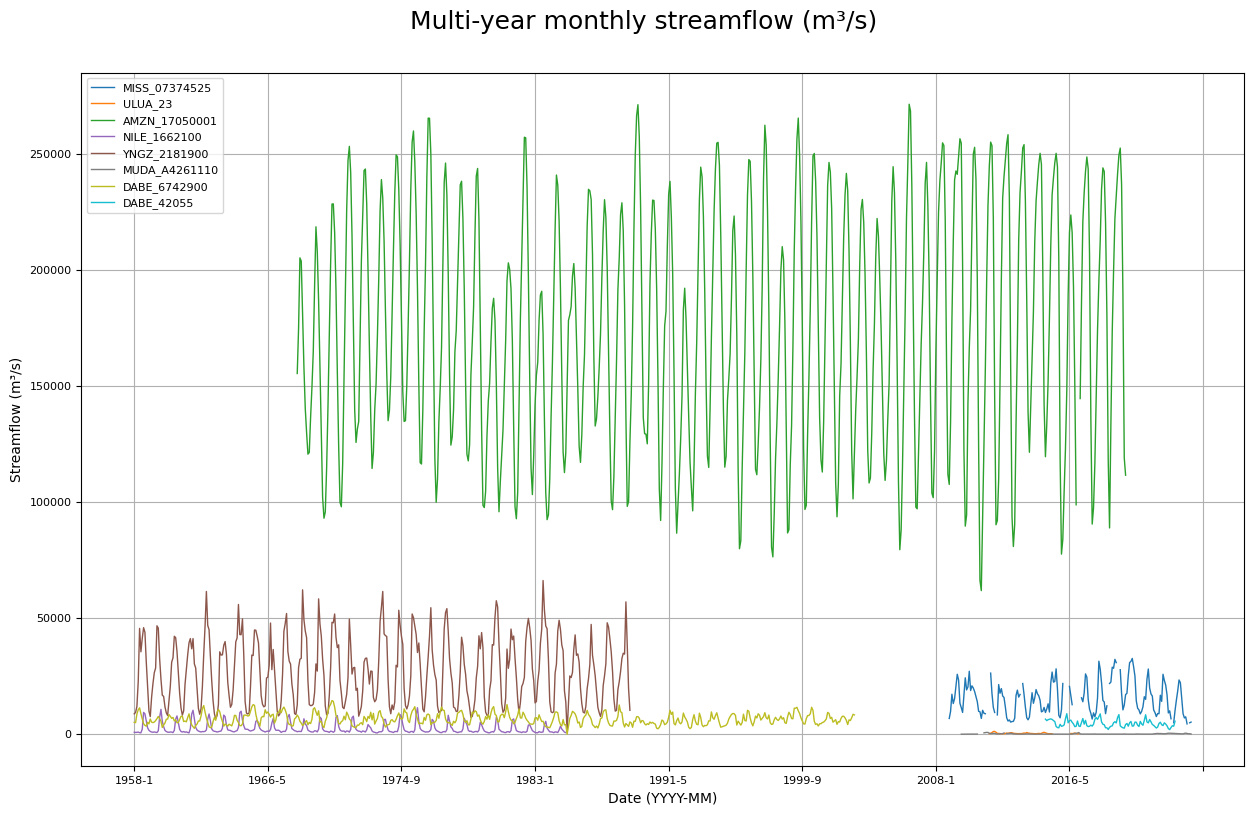

In [11]:
str_flows.plot(x="yr-mth", colormap='tab10', linewidth=1, fontsize=8, figsize=[15, 9])
plt.suptitle("Multi-year monthly streamflow (m\u00B3/s)", fontsize=18, y=0.95)
plt.xlabel('Date (YYYY-MM)', fontsize=10)
plt.ylabel('Streamflow (m\u00B3/s)', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

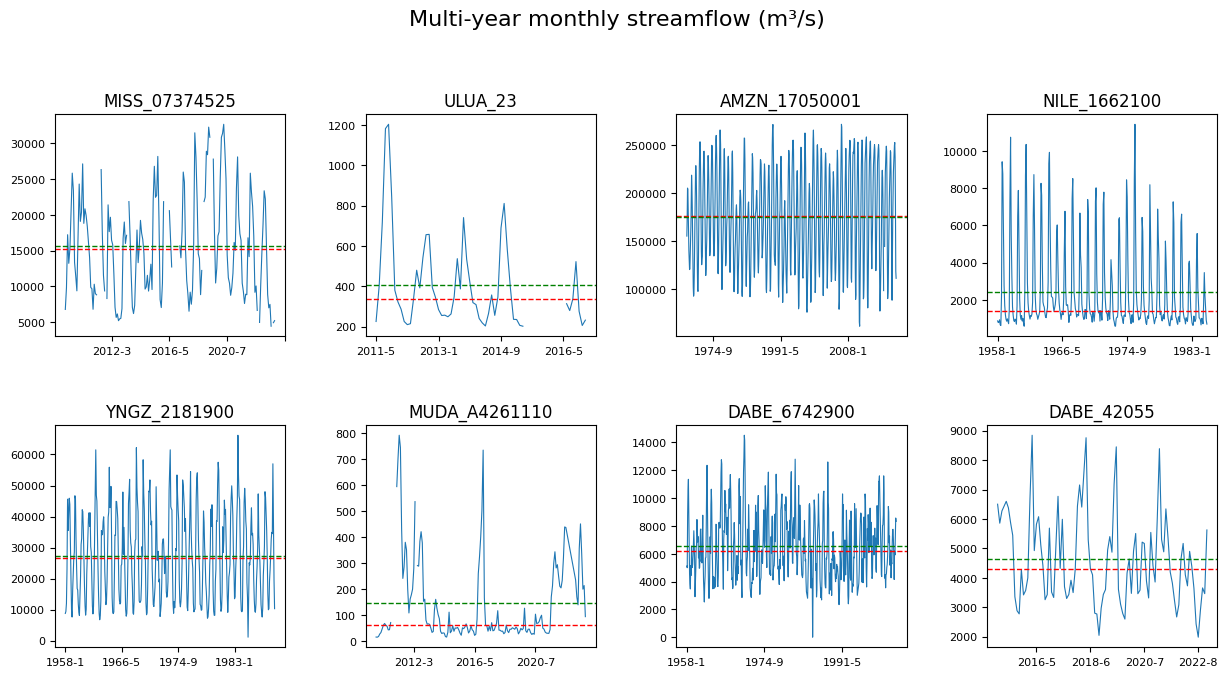

In [12]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.35)
plt.suptitle("Multi-year monthly streamflow (m\u00B3/s)", fontsize=16, y=0.95)

str_flows2 = str_flows.set_index("yr-mth")
tickers = str_flows2.columns.tolist()

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):

    # add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # filter df and plot ticker on the new subplot axis
    str_flows2[[ticker]].plot(ax=ax, linewidth=0.8)

    # determine median and mean values
    median_value = str_flows2[ticker].median()
    ax.axhline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

    mean_value = str_flows2[ticker].mean()
    ax.axhline(mean_value, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.tick_params(axis="both", labelsize=8)
    ax.set_xlabel("")

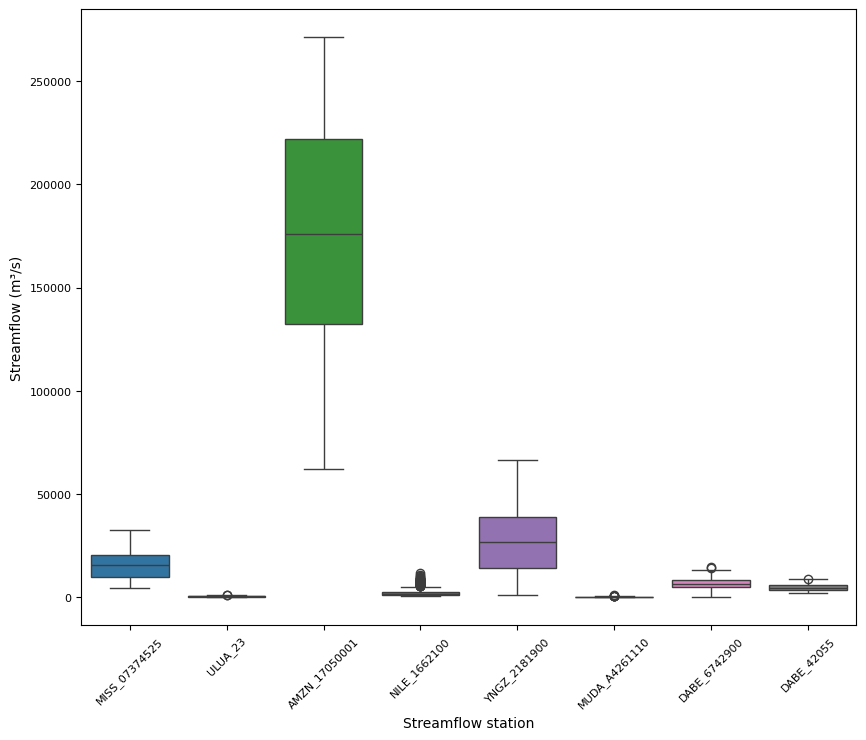

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=str_flows)
plt.xlabel('Streamflow station', fontsize=10)
plt.ylabel('Streamflow (m\u00B3/s)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [14]:
str_flows["mth_int"] = str_flows["yr-mth"].apply(lambda row: int(row.split("-")[1]))
str_flows["month"] = str_flows["yr-mth"].apply(lambda row: calendar.month_abbr[int(row.split("-")[1])])
str_flows["year"] = str_flows["yr-mth"].apply(lambda row: int(row.split("-")[0]))
str_flows

,yr-mth,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055,mth_int,month,year
0,1958-1,NaN,NaN,NaN,866.0,8770.0,NaN,5113.0,NaN,1,Jan,1958
1,1958-2,NaN,NaN,NaN,777.0,9400.0,NaN,4995.0,NaN,2,Feb,1958
2,1958-3,NaN,NaN,NaN,810.0,12000.0,NaN,8735.0,NaN,3,Mar,1958
3,1958-4,NaN,NaN,NaN,925.0,22900.0,NaN,10573.0,NaN,4,Apr,1958
4,1958-5,NaN,NaN,NaN,660.0,45600.0,NaN,11352.0,NaN,5,May,1958
...,...,...,...,...,...,...,...,...,...,...,...,...
787,2023-8,7495.469295,NaN,NaN,NaN,NaN,449.813,NaN,NaN,8,Aug,2023
788,2023-9,4442.913232,NaN,NaN,NaN,NaN,335.637,NaN,NaN,9,Sep,2023
789,2023-10,NaN,NaN,NaN,NaN,NaN,199.097,NaN,NaN,10,Oct,2023
790,2023-11,4935.626362,NaN,NaN,NaN,NaN,212.866,NaN,NaN,11,Nov,2023


In [15]:
# Monthly values
str_flows_month = str_flows.drop(["year", "yr-mth", "mth_int"], axis=1).groupby(["month"], sort=False).mean()
str_flows_month

,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
month,,,,,,,,
Jan,17160.009040,278.971783,141591.081594,1221.962963,9555.806452,140.966857,6249.066667,4875.120968
Feb,17795.722246,238.859430,165815.720081,1045.703704,10470.000000,137.875571,6391.888889,5862.010468
Mar,22268.368166,222.710403,191272.642680,845.111111,14781.935484,143.839429,7366.755556,6216.854839
Apr,23282.313538,217.008083,216693.717949,1125.407407,23245.161290,152.124286,8879.111111,5312.416667
May,20967.445039,272.687339,235180.645161,1116.888889,33603.225806,90.561615,9048.666667,5560.846774
Jun,18600.527479,380.389333,237578.910256,1005.333333,38958.064516,92.154071,8026.022222,5272.458333
Jul,15272.408045,436.601587,225448.697270,2004.814815,48100.000000,138.567071,6808.355556,3911.290323
Aug,11454.164450,559.170193,197358.250620,6705.592593,40712.903226,175.290067,5415.533333,3289.072581
Sep,8902.439013,762.536133,154419.057692,6897.074074,38696.774194,178.601500,4741.022222,3117.583333


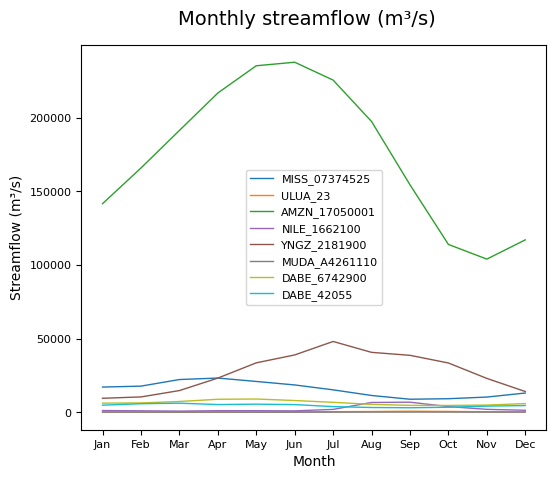

In [16]:
str_flows_month.plot(colormap='tab10', linewidth=1, fontsize=8, figsize=[6, 5])
plt.suptitle("Monthly streamflow (m\u00B3/s)", fontsize=14, y=0.95)
plt.xticks(range(0, 12, 1), str_flows_month.index.to_list())
plt.xlabel('Month', fontsize=10)
plt.ylabel('Streamflow (m\u00B3/s)', fontsize=10)
plt.legend(fontsize=8)
#plt.grid(True)
plt.show()

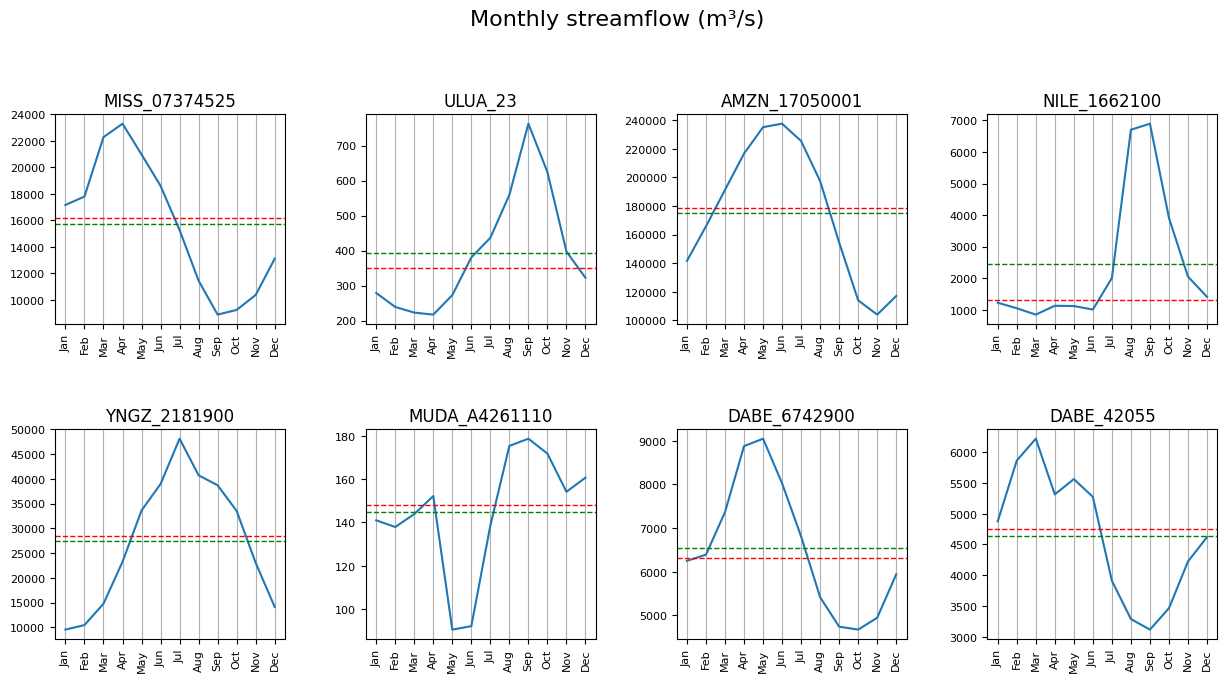

In [17]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
plt.suptitle("Monthly streamflow (m\u00B3/s)", fontsize=16, y=0.95)

tickers = str_flows_month.columns.tolist()

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # filter df and plot ticker on the new subplot axis
    str_flows_month[[ticker]].plot(ax=ax)

    # determine median and mean values
    median_value = str_flows_month[ticker].median()
    ax.axhline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

    mean_value = str_flows_month[ticker].mean()
    ax.axhline(mean_value, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xticks(range(0, 12, 1), str_flows_month.index.to_list(), rotation=90)
    ax.tick_params(axis="both", labelsize=8)
    ax.grid(True, axis="x")
    ax.set_xlabel("")

In [18]:
# Numbers represent the ordered months to be used for the determination of the depletion constant (alpha). They were determined by analyzing the previous plots
k_months_dict = {
    'MISS_07374525':[7, 8, 9],
    'ULUA_23': [12, 1, 2, 3, 4],
    'AMZN_17050001': [9, 10, 11],
    'NILE_1662100': [12, 1, 2, 3],
    'YNGZ_2181900': [11, 12, 1],
    'MUDA_A4261110': [4, 5, 6],
    'DABE_6742900': [8, 9, 10],
    'DABE_42055': [7, 8, 9]
}

In [20]:
sts_names = tickers
sts_k_flows = pd.DataFrame(columns=['station', 'mth_int', 'order', 'streamflow'])   

for sts_name in sts_names:
    target_values = k_months_dict[sts_name]

    sts_df = str_flows[[sts_name, "mth_int"]]
    for target_value in target_values:
        filtered_df = sts_df.loc[sts_df["mth_int"].isin(target_values)].dropna() # Extract rows using loc
        filtered_df["order"] = filtered_df["mth_int"].apply(lambda row: k_months_dict[sts_name].index(row)) # Assign the order to be plotted correctly then
        filtered_df.rename(columns={sts_name: 'streamflow'}, inplace=True) # Rename column name
        filtered_df["station"] = sts_name # Assign the name of the station as a column value
        filtered_df = filtered_df[['station', 'mth_int', 'order', 'streamflow']] # Reorder columns
        sts_k_flows = pd.concat([sts_k_flows, filtered_df], ignore_index=True) # Concatenate all station values

sts_k_flows

C:\Users\jvalenciag\AppData\Local\Temp\ipykernel_20668\4136344673.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sts_k_flows = pd.concat([sts_k_flows, filtered_df], ignore_index=True) # Concatenate all station values


,station,mth_int,order,streamflow
0,MISS_07374525,7,0,13357.056541
1,MISS_07374525,8,1,11473.986242
2,MISS_07374525,9,2,9384.202963
3,MISS_07374525,7,0,16222.721417
4,MISS_07374525,8,1,14039.492544
...,...,...,...,...
2008,DABE_42055,8,1,3819.677419
2009,DABE_42055,9,2,3224.333333
2010,DABE_42055,7,0,2432.258065
2011,DABE_42055,8,1,1982.258065


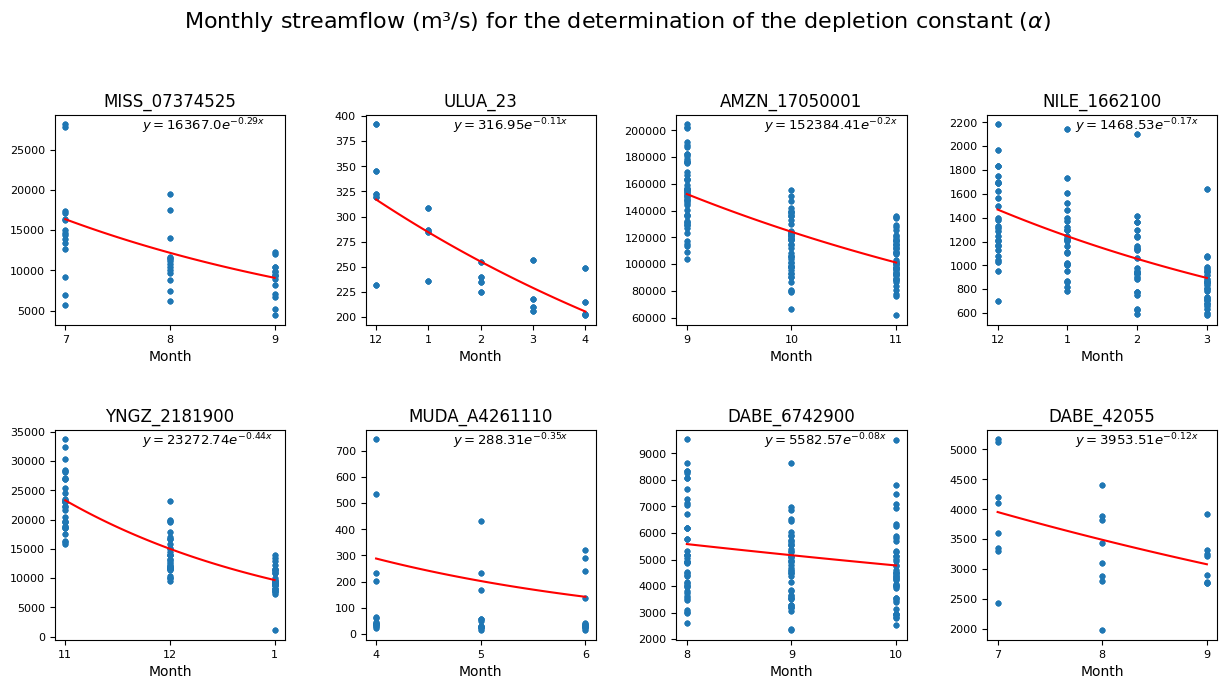

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
plt.suptitle("Monthly streamflow (m\u00B3/s) for the determination of the depletion constant (" + r"$\alpha$)", fontsize=16, y=0.95)

tickers = str_flows_month.columns.tolist()

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    data_plt = sts_k_flows.loc[sts_k_flows["station"] == ticker].drop(["mth_int", "station"], axis=1)

    # filter df and plot ticker on the new subplot axis
    data_plt.plot.scatter(x="order", y="streamflow", ax=ax, s=10)

    x = list(data_plt["order"])
    y = list(data_plt["streamflow"])

    # Fit an exponential regression model
    coefficients = np.polyfit(x, np.log(y), 1, w=np.sqrt(y)) # Use of weights (w) to avoid bias towards small values
    generated_x = np.linspace(min(x), max(x), 100)
    beta = np.exp(coefficients[1])
    alpha = coefficients[0]
    regression_curve= beta * np.exp(alpha * generated_x)

    # chart formatting
    ax.plot(generated_x, regression_curve, color='red', label='Exponential fit')
    # Adding text without box on the plot.
    ax.text(.38, 0.995, r"$y = " + str(round(beta, 2)) + r" e^{" + str(round(alpha, 2)) + r"x}$",
        fontsize=9.5, ha='left', va='top', transform=ax.transAxes)
    ax.set_xticks(range(len(k_months_dict[ticker])), k_months_dict[ticker])
    ax.set_title(ticker.upper())
    ax.tick_params(axis="both", labelsize=8)
    ax.set_xlabel("Month")
    ax.set_ylabel("")

Note that Excel, LibreOffice and most scientific calculators typically use the unweighted (biased) formula for the exponential regression / trend lines. If you want your results to be compatible with these platforms, do not include the weights even if it provides better results.

In [22]:
# The depletion constant (alpha) values of the calibration basins were determined from hydrographs (see previous cell) derived from the gathered streamflow datasets.
# Based on the depletion constant, then the recession contant (k) is calculated as shown below.
# For the rest of the world, k will be defined as 0.5
k_dict = {
    'MISS_07374525': round(np.exp(-0.29), 2),
    'ULUA_23': round(np.exp(-0.11), 2),
    'AMZN_17050001': round(np.exp(-0.20), 2),
    'NILE_1662100': round(np.exp(-0.17), 2),
    'YNGZ_2181900': round(np.exp(-0.44), 2),
    'MUDA_A4261110': round(np.exp(-0.35), 2),
    'DABE_6742900': round(np.exp(-0.08), 2),
    'DABE_42055': round(np.exp(-0.12), 2)
}
k_dict

{'MISS_07374525': 0.75,
 'ULUA_23': 0.9,
 'AMZN_17050001': 0.82,
 'NILE_1662100': 0.84,
 'YNGZ_2181900': 0.64,
 'MUDA_A4261110': 0.7,
 'DABE_6742900': 0.92,
 'DABE_42055': 0.89}

In [23]:
# Yearly values
str_flows_year = str_flows.drop(["month", "yr-mth", "mth_int"], axis=1).groupby(["year"], sort=False).mean()
str_flows_year

,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
year,,,,,,,,
1958,NaN,NaN,NaN,2930.166667,27230.833333,NaN,6467.666667,NaN
1959,NaN,NaN,NaN,2954.416667,24500.000000,NaN,5516.083333,NaN
1960,NaN,NaN,NaN,2482.833333,24215.833333,NaN,6601.916667,NaN
1961,NaN,NaN,NaN,3166.500000,28201.666667,NaN,5335.000000,NaN
1962,NaN,NaN,NaN,2800.000000,29700.833333,NaN,6569.166667,NaN
...,...,...,...,...,...,...,...,...
2019,22341.142462,NaN,202465.525066,NaN,NaN,49.568750,NaN,4612.550947
2020,20056.114526,NaN,NaN,NaN,NaN,58.693583,NaN,4360.649333
2021,15153.288511,NaN,NaN,NaN,NaN,130.340750,NaN,4826.040835


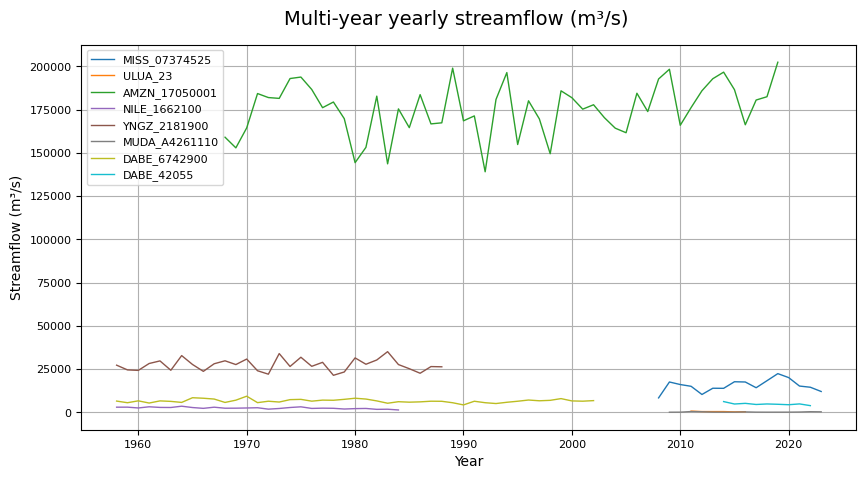

In [24]:
str_flows_year.plot(colormap='tab10', linewidth=1, fontsize=8, figsize=[10, 5])
plt.suptitle("Multi-year yearly streamflow (m\u00B3/s)", fontsize=14, y=0.95)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Streamflow (m\u00B3/s)', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

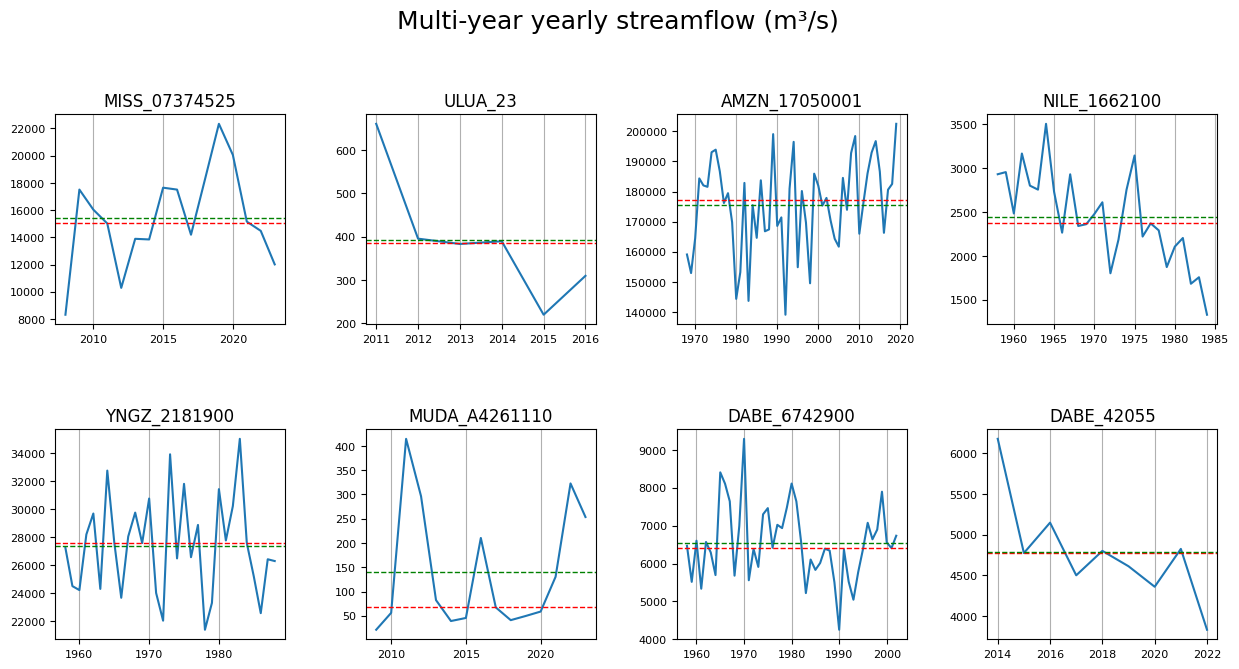

In [25]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
plt.suptitle("Multi-year yearly streamflow (m\u00B3/s)", fontsize=18, y=0.95)

tickers = str_flows_year.columns.tolist()

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # filter df and plot ticker on the new subplot axis
    str_flows_year[[ticker]].plot(ax=ax)

    # determine median and mean values
    median_value = str_flows_year[ticker].median()
    ax.axhline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

    mean_value = str_flows_year[ticker].mean()
    ax.axhline(mean_value, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    #ax.set_xticks(range(0, 12, 1), str_flows_year.index.to_list(), rotation=90)
    ax.tick_params(axis="both", labelsize=8)
    ax.grid(True, axis="x")
    ax.set_xlabel("")